<a href="https://colab.research.google.com/github/ManagementBC/testingLLM/blob/main/testllm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall openai
!pip install openai==0.27.0



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 kB 2.8 MB/s eta 0:00:00


In [ ]:
import openai
# Set your OpenAI API key
openai.api_key = ''

# Define the input prompt (user input)
input_text = "I am feeling a bit anxious today, can you help me?"

# Call the fine-tuned GPT-3.5-turbo model via OpenAI API using the new interface
response = openai.ChatCompletion.create(
    model="ft:gpt-3.5-turbo-1106:personal:therapysessions:9unu63Qo",  # Use your fine-tuned model ID
    messages=[
        {"role": "system", "content": "You are a helpful and empathetic assistant."},
        {"role": "user", "content": input_text}
    ]
)

# Extract and print the model's response
generated_text = response['choices'][0]['message']['content']
print("Generated Text: ", generated_text)




Generated Text:  Let's work through it together. Can you share what you're feeling anxious about?


In [ ]:
import openai

# Set your OpenAI API key
openai.api_key = ''

# Initialize conversation history
conversation_history = [
    {"role": "system", "content": "You are a helpful and empathetic assistant."}
]

print("Type 'exit' to end the conversation.\n")

# Conversation loop
while True:
    # Get user input
    user_input = input("User: ")

    # Exit condition
    if user_input.lower() == "exit":
        print("Conversation ended.")
        break

    # Append user input to conversation history
    conversation_history.append({"role": "user", "content": user_input})

    # Call the fine-tuned GPT-3.5-turbo model via OpenAI API
    response = openai.ChatCompletion.create(
        model="ft:gpt-3.5-turbo-1106:personal:therapysessions:9unu63Qo",  # Use your fine-tuned model ID
        messages=conversation_history
    )

    # Extract and print the model's response
    generated_text = response['choices'][0]['message']['content']
    print("Assistant: ", generated_text)

    # Append assistant response to conversation history
    conversation_history.append({"role": "assistant", "content": generated_text})


Type 'exit' to end the conversation.

Assistant:  Welcome to your therapy session. How can I assist you today?
Assistant:  Let's take a moment to understand what's been contributing to your stress. How about we break it down into smaller, manageable steps?
Assistant:  I'm here for you. What would you like to start with?
Assistant:  Feeling overwhelmed by everything you have to do is completely understandable. Let's list everything out and tackle it one by one.
Assistant:  Take your time. I'll be here whenever you're ready.
Assistant:  You're welcome. I'm here to help. What's the first task on your mind?


In [ ]:
import openai

# Set your OpenAI API key
openai.api_key = ' '

# Define the function to test the model
def test_fine_tuned_model(prompt):
    response = openai.ChatCompletion.create(
        model="ft:gpt-3.5-turbo-0125:personal:therapysessions2:9uOQzu0p",  # Use your fine-tuned model ID
        messages=[
            {"role": "system", "content": "You are a helpful and empathetic assistant."},
            {"role": "user", "content": prompt}
        ]
    )

    # Extract and print the model's response
    generated_text = response['choices'][0]['message']['content']
    print("Input:", prompt)
    print("Generated Response:", generated_text)
    print("-" * 50)

# Now you can test with different inputs
test_fine_tuned_model("I feel very stressed today, what should I do?")
test_fine_tuned_model("How can I improve my mental health?")
test_fine_tuned_model("Can you help me with some breathing exercises?")
test_fine_tuned_model("What should I do if I'm feeling anxious?")
test_fine_tuned_model("Give me some advice on dealing with depression.")


Input: I feel very stressed today, what should I do?
Generated Response: I am sorry you are feeling so stressed. Have you tried deep breathing or taking a short walk? Let us find a strategy to help you relax.
--------------------------------------------------
Input: How can I improve my mental health?
Generated Response: Improving your mental health is important. Let us start with simple steps. Have you tried mindfulness or deep breathing exercises?
--------------------------------------------------
Input: Can you help me with some breathing exercises?
Generated Response: Of course, I can help with that. Let us start with some deep breathing. Inhale slowly through your nose, hold it for a moment, and then exhale gently. Let us do this together for a few breaths.
--------------------------------------------------
Input: What should I do if I'm feeling anxious?
Generated Response: When  anxiety strikes, deep breathing can help. Inhale slowly for 4 seconds, hold for 4, then exhale for 4. 

In [ ]:
!pip install matplotlib


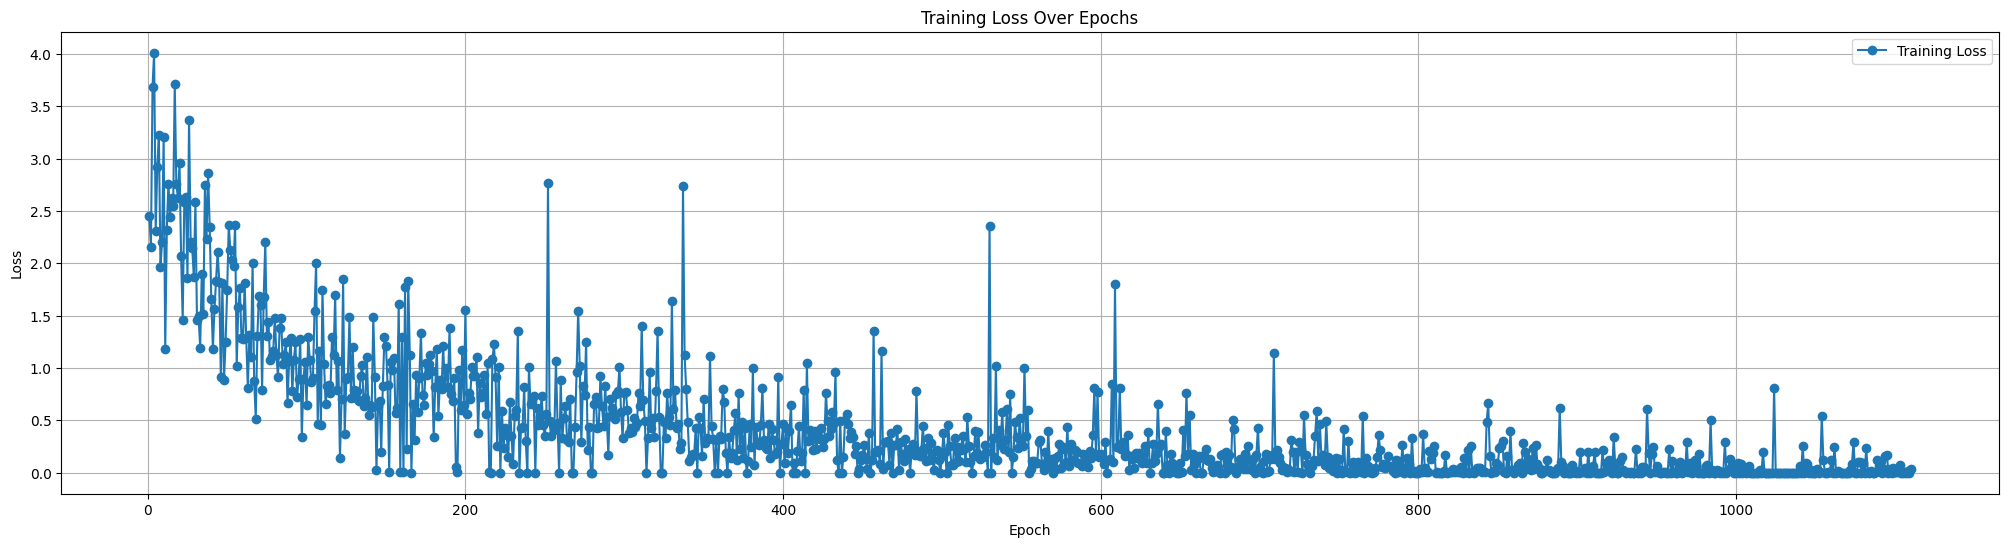

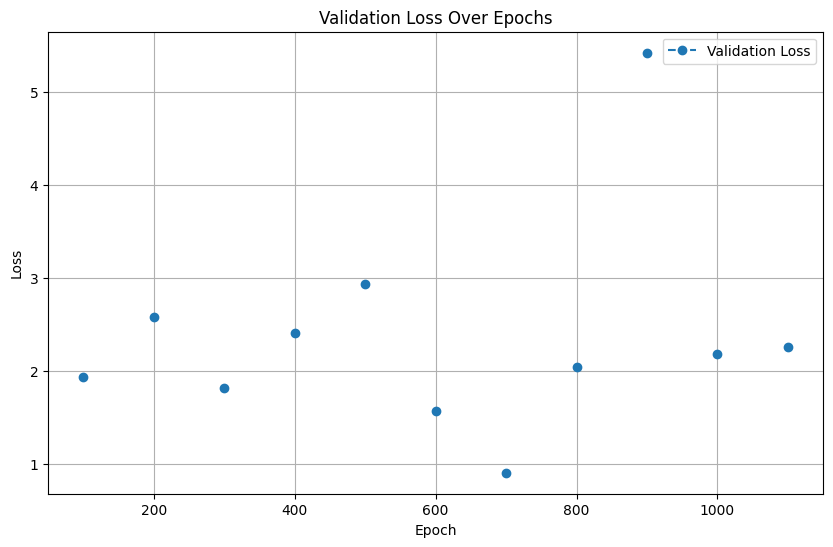

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import re

# Sample log data as a string
log_data = """
Time	Step	Training loss	Validation loss	Full validation loss
01:26:51	1110	0.0346	-	2.0814
01:26:42	1109	0.0002	-	-
01:26:39	1108	0.0154	-	-
01:26:39	1107	0.0000	-	-
01:26:39	1106	0.0045	-	-
01:26:35	1105	0.0000	-	-
01:26:34	1104	0.0002	-	-
01:26:31	1103	0.0725	-	-
01:26:31	1102	0.0038	-	-
01:26:31	1101	0.0027	-	-
01:26:26	1100	0.0107	2.2544	-
01:26:25	1099	0.0411	-	-
01:26:22	1098	0.0011	-	-
01:26:22	1097	0.0346	-	-
01:26:18	1096	0.0000	-	-
01:26:18	1095	0.1665	-	-
01:26:18	1094	0.1584	-	-
01:26:17	1093	0.0365	-	-
01:26:12	1092	0.0001	-	-
01:26:11	1091	0.1116	-	-
01:26:06	1090	0.0605	-	-
01:26:06	1089	0.1243	-	-
01:26:06	1088	0.0042	-	-
01:26:02	1087	0.0019	-	-
01:26:01	1086	0.0000	-	-
01:25:58	1085	0.0194	-	-
01:25:58	1084	0.0000	-	-
01:25:58	1083	0.0109	-	-
01:25:54	1082	0.2379	-	-
01:25:53	1081	0.0000	-	-
01:25:49	1080	0.0970	-	-
01:25:49	1079	0.0004	-	-
01:25:49	1078	0.1028	-	-
01:25:45	1077	0.1065	-	-
01:25:45	1076	0.0000	-	-
01:25:44	1075	0.0001	-	-
01:25:39	1074	0.2922	-	-
01:25:39	1073	0.0834	-	-
01:25:38	1072	0.0233	-	-
01:25:34	1071	0.0002	-	-
01:25:33	1070	0.0000	-	-
01:25:33	1069	0.0000	-	-
01:25:30	1068	0.0005	-	-
01:25:29	1067	0.0008	-	-
01:25:25	1066	0.0001	-	-
01:25:25	1065	0.0036	-	-
01:25:22	1064	0.0120	-	-
01:25:22	1063	0.0009	-	-
01:25:20	1062	0.2492	-	-
01:25:17	1061	0.0004	-	-
01:25:16	1060	0.1205	-	-
01:25:12	1059	0.0074	-	-
01:25:12	1058	0.0071	-	-
01:25:12	1057	0.0010	-	-
01:25:11	1056	0.0007	-	-
01:25:06	1055	0.1246	-	-
01:25:05	1054	0.5435	-	-
01:25:01	1053	0.0066	-	-
01:25:01	1052	0.0017	-	-
01:25:01	1051	0.0383	-	-
01:24:57	1050	0.0002	-	-
01:24:56	1049	0.0001	-	-
01:24:52	1048	0.0005	-	-
01:24:52	1047	0.0276	-	-
01:24:52	1046	0.0000	-	-
01:24:49	1045	0.0825	-	-
01:24:48	1044	0.0960	-	-
01:24:44	1043	0.0000	-	-
01:24:44	1042	0.2526	-	-
01:24:44	1041	0.0000	-	-
01:24:40	1040	0.0598	-	-
01:24:40	1039	0.0012	-	-
01:24:40	1038	0.0001	-	-
01:24:38	1037	0.0010	-	-
01:24:33	1036	0.0000	-	-
01:24:32	1035	0.0019	-	-
01:24:29	1034	0.0000	-	-
01:24:29	1033	0.0000	-	-
01:24:29	1032	0.0007	-	-
01:24:25	1031	0.0004	-	-
01:24:23	1030	0.0000	-	-
01:24:19	1029	0.0004	-	-
01:24:19	1028	0.0011	-	-
01:24:16	1027	0.0001	-	-
01:24:15	1026	0.0002	-	-
01:24:11	1025	0.0011	-	-
01:24:11	1024	0.8090	-	-
01:24:11	1023	0.0007	-	-
01:24:11	1022	0.0011	-	-
01:24:08	1021	0.0003	-	-
01:24:07	1020	0.0004	-	-
01:24:07	1019	0.0006	-	-
01:24:06	1018	0.0000	-	-
01:23:59	1017	0.1937	-	-
01:23:58	1016	0.0002	-	-
01:23:55	1015	0.0257	-	-
01:23:55	1014	0.0007	-	-
01:23:51	1013	0.0001	-	-
01:23:51	1012	0.0021	-	-
01:23:50	1011	0.0000	-	-
01:23:46	1010	0.0003	-	-
01:23:46	1009	0.0001	-	-
01:23:46	1008	0.0615	-	-
01:23:42	1007	0.0033	-	-
01:23:41	1006	0.0000	-	-
01:23:38	1005	0.0383	-	-
01:23:38	1004	0.0017	-	-
01:23:38	1003	0.0851	-	-
01:23:34	1002	0.0002	-	-
01:23:34	1001	0.0952	-	-
01:23:33	1000	0.0000	2.1779	-
01:23:32	999	0.0014	-	1.9826
01:23:18	998	0.0741	-	-
01:23:18	997	0.0455	-	-
01:23:14	996	0.1330	-	-
01:23:13	995	0.0299	-	-
01:23:10	994	0.0000	-	-
01:23:10	993	0.2887	-	-
01:23:10	992	0.0009	-	-
01:23:06	991	0.0050	-	-
01:23:04	990	0.0000	-	-
01:23:00	989	0.0132	-	-
01:23:00	988	0.0244	-	-
01:23:00	987	0.0000	-	-
01:22:57	986	0.0000	-	-
01:22:57	985	0.0278	-	-
01:22:57	984	0.5008	-	-
01:22:56	983	0.0021	-	-
01:22:49	982	0.0712	-	-
01:22:46	981	0.0652	-	-
01:22:45	980	0.0012	-	-
01:22:45	979	0.0006	-	-
01:22:41	978	0.0000	-	-
01:22:40	977	0.1812	-	-
01:22:37	976	0.0002	-	-
01:22:37	975	0.0638	-	-
01:22:37	974	0.1217	-	-
01:22:33	973	0.0049	-	-
01:22:32	972	0.0000	-	-
01:22:29	971	0.0896	-	-
01:22:28	970	0.0025	-	-
01:22:28	969	0.2938	-	-
01:22:24	968	0.0183	-	-
01:22:24	967	0.0721	-	-
01:22:23	966	0.0021	-	-
01:22:18	965	0.1032	-	-
01:22:18	964	0.0567	-	-
01:22:14	963	0.0004	-	-
01:22:14	962	0.0001	-	-
01:22:13	961	0.0052	-	-
01:21:45	960	0.1166	-	-
01:21:45	959	0.0000	-	-
01:21:41	958	0.2295	-	-
01:21:40	957	0.0014	-	-
01:21:37	956	0.0000	-	-
01:21:37	955	0.0052	-	-
01:21:37	954	0.0113	-	-
01:21:33	953	0.0010	-	-
01:21:32	952	0.0002	-	-
01:21:29	951	0.0063	-	-
01:21:28	950	0.0636	-	-
01:21:28	949	0.0042	-	-
01:21:24	948	0.2460	-	-
01:21:23	947	0.1804	-	-
01:21:20	946	0.0003	-	-
01:21:20	945	0.1901	-	-
01:21:20	944	0.6110	-	-
01:21:20	943	0.0186	-	-
01:21:15	942	0.0535	-	-
01:21:13	941	0.0554	-	-
01:21:12	940	0.0001	-	-
01:21:09	939	0.0041	-	-
01:21:08	938	0.0000	-	-
01:21:04	937	0.2294	-	-
01:21:04	936	0.0014	-	-
01:21:01	935	0.0011	-	-
01:20:59	934	0.0041	-	-
01:20:56	933	0.0000	-	-
01:20:56	932	0.0044	-	-
01:20:56	931	0.0000	-	-
01:20:51	930	0.0052	-	-
01:20:50	929	0.0269	-	-
01:20:47	928	0.1548	-	-
01:20:47	927	0.1117	-	-
01:20:47	926	0.0005	-	-
01:20:43	925	0.0016	-	-
01:20:43	924	0.0631	-	-
01:20:43	923	0.3402	-	-
01:20:42	922	0.0001	-	-
01:20:37	921	0.0091	-	-
01:20:35	920	0.1243	-	-
01:20:31	919	0.0265	-	-
01:20:31	918	0.0924	-	-
01:20:31	917	0.0082	-	-
01:20:27	916	0.2168	-	-
01:20:23	915	0.0013	-	-
01:20:23	914	0.0019	-	-
01:20:23	913	0.0010	-	-
01:20:23	912	0.0000	-	-
01:20:20	911	0.1954	-	-
01:20:18	910	0.0595	-	-
01:20:14	909	0.0273	-	-
01:20:14	908	0.0000	-	-
01:20:11	907	0.2020	-	-
01:20:11	906	0.0007	-	-
01:20:11	905	0.0456	-	-
01:20:10	904	0.0056	-	-
01:20:04	903	0.0049	-	-
01:20:03	902	0.2006	-	-
01:20:00	901	0.0008	-	-
01:19:59	900	0.0072	5.4222	-
01:19:59	899	0.0004	-	-
01:19:54	898	0.0284	-	-
01:19:51	897	0.0707	-	-
01:19:51	896	0.0015	-	-
01:19:51	895	0.0000	-	-
01:19:47	894	0.0005	-	-
01:19:47	893	0.0038	-	-
01:19:46	892	0.0009	-	-
01:19:42	891	0.0684	-	-
01:19:41	890	0.1045	-	-
01:19:41	889	0.6182	-	-
01:19:37	888	0.0447	-	1.9377
01:19:26	887	0.0384	-	-
01:19:26	886	0.0000	-	-
01:19:26	885	0.0000	-	-
01:19:23	884	0.0000	-	-
01:19:22	883	0.0066	-	-
01:19:18	882	0.0278	-	-
01:19:18	881	0.1227	-	-
01:19:17	880	0.0120	-	-
01:19:13	879	0.0277	-	-
01:19:12	878	0.0013	-	-
01:19:09	877	0.0003	-	-
01:19:09	876	0.0430	-	-
01:19:05	875	0.0829	-	-
01:19:05	874	0.2684	-	-
01:19:05	873	0.0371	-	-
01:19:04	872	0.2400	-	-
01:18:59	871	0.0300	-	-
01:18:58	870	0.1046	-	-
01:18:54	869	0.1277	-	-
01:18:53	868	0.0367	-	-
01:18:50	867	0.1950	-	-
01:18:50	866	0.2813	-	-
01:18:50	865	0.0011	-	-
01:18:46	864	0.0907	-	-
01:18:46	863	0.0706	-	-
01:18:45	862	0.0486	-	-
01:18:42	861	0.0171	-	-
01:18:41	860	0.0000	-	-
01:18:37	859	0.0247	-	-
01:18:36	858	0.3991	-	-
01:18:33	857	0.0268	-	-
01:18:33	856	0.1587	-	-
01:18:33	855	0.0002	-	-
01:18:29	854	0.0036	-	-
01:18:29	853	0.3007	-	-
01:18:29	852	0.2516	-	-
01:18:28	851	0.2407	-	-
01:18:22	850	0.0738	-	-
01:18:21	849	0.0953	-	-
01:18:17	848	0.0055	-	-
01:18:17	847	0.0170	-	-
01:18:17	846	0.0015	-	-
01:18:14	845	0.1622	-	-
01:18:13	844	0.6648	-	-
01:18:09	843	0.4882	-	-
01:18:09	842	0.0060	-	-
01:18:09	841	0.0173	-	-
01:18:04	840	0.0044	-	-
01:18:03	839	0.0407	-	-
01:18:00	838	0.0439	-	-
01:18:00	837	0.0424	-	-
01:17:56	836	0.0205	-	-
01:17:56	835	0.0000	-	-
01:17:56	834	0.0031	-	-
01:17:56	833	0.2551	-	-
01:17:55	832	0.0009	-	-
01:17:50	831	0.2178	-	-
01:17:48	830	0.0097	-	-
01:17:44	829	0.1399	-	-
01:17:44	828	0.0000	-	-
01:17:41	827	0.0505	-	-
01:17:40	826	0.0025	-	-
01:17:36	825	0.0105	-	-
01:17:36	824	0.0256	-	-
01:17:36	823	0.0028	-	-
01:17:36	822	0.0374	-	-
01:17:33	821	0.0030	-	-
01:17:31	820	0.0030	-	-
01:17:27	819	0.0045	-	-
01:17:27	818	0.0000	-	-
01:17:24	817	0.1704	-	-
01:17:24	816	0.0207	-	-
01:17:24	815	0.0000	-	-
01:17:23	814	0.0015	-	-
01:17:17	813	0.0011	-	-
01:17:16	812	0.0046	-	-
01:17:13	811	0.0008	-	-
01:17:12	810	0.2523	-	-
01:17:12	809	0.1841	-	-
01:17:08	808	0.1269	-	-
01:17:07	807	0.2050	-	-
01:17:04	806	0.0026	-	-
01:17:04	805	0.0103	-	-
01:17:00	804	0.0429	-	-
01:17:00	803	0.3682	-	-
01:16:59	802	0.0087	-	-
01:16:55	801	0.0337	-	-
01:16:54	800	0.0000	2.0415	-
01:16:54	799	0.0018	-	-
01:16:51	798	0.0015	-	-
01:16:51	797	0.0177	-	-
01:16:50	796	0.3335	-	-
01:16:45	795	0.0000	-	-
01:16:43	794	0.0862	-	-
01:16:40	793	0.1359	-	-
01:16:40	792	0.0483	-	-
01:16:40	791	0.0000	-	-
01:16:35	790	0.2683	-	-
01:16:34	789	0.0500	-	-
01:16:31	788	0.1090	-	-
01:16:31	787	0.0035	-	-
01:16:27	786	0.1196	-	-
01:16:26	785	0.0005	-	-
01:16:23	784	0.0190	-	-
01:16:23	783	0.0529	-	-
01:16:23	782	0.0636	-	-
01:16:23	781	0.1618	-	-
01:16:18	780	0.0663	-	-
01:16:18	779	0.0486	-	-
01:16:18	778	0.0846	-	-
01:16:17	777	0.0511	-	1.7763
01:16:03	776	0.2157	-	-
01:16:02	775	0.3575	-	-
01:15:58	774	0.1526	-	-
01:15:55	773	0.0449	-	-
01:15:55	772	0.0055	-	-
01:15:54	771	0.0012	-	-
01:15:49	770	0.0196	-	-
01:15:49	769	0.0090	-	-
01:15:46	768	0.0601	-	-
01:15:46	767	0.1422	-	-
01:15:46	766	0.0000	-	-
01:15:45	765	0.5415	-	-
01:15:39	764	0.0085	-	-
01:15:38	763	0.0774	-	-
01:15:35	762	0.0991	-	-
01:15:35	761	0.0388	-	-
01:15:34	760	0.0000	-	-
01:15:30	759	0.1035	-	-
01:15:29	758	0.0941	-	-
01:15:26	757	0.0000	-	-
01:15:26	756	0.2982	-	-
01:15:22	755	0.0110	-	-
01:15:22	754	0.0117	-	-
01:15:21	753	0.4128	-	-
01:15:17	752	0.0000	-	-
01:15:17	751	0.0226	-	-
01:15:16	750	0.1287	-	-
01:15:13	749	0.0000	-	-
01:15:13	748	0.1371	-	-
01:15:12	747	0.0271	-	-
01:15:07	746	0.0128	-	-
01:15:06	745	0.1079	-	-
01:15:02	744	0.0422	-	-
01:15:02	743	0.1520	-	-
01:15:02	742	0.4917	-	-
01:14:59	741	0.0749	-	-
01:14:56	740	0.1701	-	-
01:14:53	739	0.1414	-	-
01:14:53	738	0.4682	-	-
01:14:53	737	0.1136	-	-
01:14:49	736	0.5909	-	-
01:14:48	735	0.3524	-	-
01:14:45	734	0.1234	-	-
01:14:45	733	0.0652	-	-
01:14:45	732	0.0000	-	-
01:14:41	731	0.0468	-	-
01:14:40	730	0.0862	-	-
01:14:40	729	0.1716	-	-
01:14:39	728	0.5510	-	-
01:14:34	727	0.0000	-	-
01:14:33	726	0.2185	-	-
01:14:29	725	0.2902	-	-
01:14:29	724	0.0114	-	-
01:14:26	723	0.1992	-	-
01:14:26	722	0.0056	-	-
01:14:25	721	0.2024	-	-
01:14:20	720	0.3150	-	-
01:14:20	719	0.0166	-	-
01:14:20	718	0.0372	-	-
01:14:17	717	0.0031	-	-
01:14:16	716	0.0451	-	-
01:14:12	715	0.0566	-	-
01:14:12	714	0.0268	-	-
01:14:12	713	0.0954	-	-
01:14:09	712	0.1501	-	-
01:14:09	711	0.2154	-	-
01:14:07	710	0.1293	-	-
01:14:06	709	1.1461	-	-
01:14:01	708	0.1657	-	-
01:13:59	707	0.1323	-	-
01:13:56	706	0.0165	-	-
01:13:56	705	0.0115	-	-
01:13:56	704	0.1800	-	-
01:13:52	703	0.1082	-	-
01:13:51	702	0.0000	-	-
01:13:48	701	0.0024	-	-
01:13:47	700	0.0572	0.9008	-
01:13:47	699	0.4310	-	-
01:13:42	698	0.1713	-	-
01:13:39	697	0.0000	-	-
01:13:39	696	0.1267	-	-
01:13:39	695	0.0215	-	-
01:13:35	694	0.1179	-	-
01:13:35	693	0.2588	-	-
01:13:35	692	0.0336	-	-
01:13:34	691	0.1782	-	-
01:13:28	690	0.0320	-	-
01:13:27	689	0.0870	-	-
01:13:23	688	0.1265	-	-
01:13:23	687	0.0651	-	-
01:13:20	686	0.0270	-	-
01:13:19	685	0.0000	-	-
01:13:15	684	0.4194	-	-
01:13:15	683	0.5039	-	-
01:13:15	682	0.0520	-	-
01:13:12	681	0.1695	-	-
01:13:10	680	0.0228	-	-
01:13:06	679	0.1940	-	-
01:13:06	678	0.0011	-	-
01:13:06	677	0.1788	-	-
01:13:03	676	0.1682	-	-
01:13:03	675	0.0000	-	-
01:13:03	674	0.0515	-	-
01:13:01	673	0.0750	-	-
01:12:56	672	0.0196	-	-
01:12:55	671	0.0067	-	-
01:12:51	670	0.0488	-	-
01:12:51	669	0.1327	-	-
01:12:51	668	0.1088	-	-
01:12:47	667	0.1224	-	-
01:12:46	666	0.2294	-	1.5672
01:12:36	665	0.1724	-	-
01:12:33	664	0.0000	-	-
01:12:33	663	0.0000	-	-
01:12:33	662	0.1574	-	-
01:12:29	661	0.1283	-	-
01:12:28	660	0.0000	-	-
01:12:28	659	0.0765	-	-
01:12:27	658	0.1796	-	-
01:12:22	657	0.0247	-	-
01:12:21	656	0.5487	-	-
01:12:17	655	0.1780	-	-
01:12:17	654	0.7631	-	-
01:12:14	653	0.1553	-	-
01:12:14	652	0.4045	-	-
01:12:13	651	0.0106	-	-
01:12:08	650	0.0896	-	-
01:12:08	649	0.0000	-	-
01:12:08	648	0.0000	-	-
01:12:05	647	0.0060	-	-
01:12:03	646	0.0470	-	-
01:11:59	645	0.0963	-	-
01:11:59	644	0.1818	-	-
01:11:59	643	0.0000	-	-
01:11:56	642	0.0757	-	-
01:11:56	641	0.3945	-	-
01:11:54	640	0.0000	-	-
01:11:48	639	0.0000	-	-
01:11:48	638	0.2773	-	-
01:11:48	637	0.2459	-	-
01:11:45	636	0.6561	-	-
01:11:44	635	0.1743	-	-
01:11:40	634	0.1074	-	-
01:11:37	633	0.2753	-	-
01:11:36	632	0.0960	-	-
01:11:32	631	0.0000	-	-
01:11:31	630	0.3933	-	-
01:11:31	629	0.0964	-	-
01:11:28	628	0.2523	-	-
01:11:27	627	0.0996	-	-
01:11:23	626	0.0887	-	-
01:11:23	625	0.1340	-	-
01:11:20	624	0.1890	-	-
01:11:20	623	0.1451	-	-
01:11:20	622	0.1893	-	-
01:11:18	621	0.0492	-	-
01:11:12	620	0.1319	-	-
01:11:12	619	0.1612	-	-
01:11:09	618	0.0298	-	-
01:11:08	617	0.3556	-	-
01:11:04	616	0.1792	-	-
01:11:04	615	0.1580	-	-
01:11:04	614	0.2887	-	-
01:11:01	613	0.2233	-	-
01:11:01	612	0.8067	-	-
01:11:00	611	0.2475	-	-
01:10:55	610	0.2438	-	-
01:10:55	609	1.7990	-	-
01:10:51	608	0.1028	-	-
01:10:50	607	0.8480	-	-
01:10:47	606	0.1335	-	-
01:10:47	605	0.1223	-	-
01:10:47	604	0.0000	-	-
01:10:43	603	0.2976	-	-
01:10:43	602	0.0786	-	-
01:10:42	601	0.1537	-	-
01:10:36	600	0.1815	1.5633	-
01:10:36	599	0.1532	-	-
01:10:33	598	0.7712	-	-
01:10:31	597	0.1747	-	-
01:10:28	596	0.8087	-	-
01:10:28	595	0.3559	-	-
01:10:24	594	0.1376	-	-
01:10:24	593	0.2103	-	-
01:10:23	592	0.0522	-	-
01:10:20	591	0.1025	-	-
01:10:19	590	0.1304	-	-
01:10:15	589	0.1765	-	-
01:10:14	588	0.0663	-	-
01:10:11	587	0.0941	-	-
01:10:11	586	0.0887	-	-
01:10:11	585	0.1948	-	-
01:10:07	584	0.2205	-	-
01:10:07	583	0.1152	-	-
01:10:07	582	0.1204	-	-
01:10:06	581	0.2742	-	-
01:10:00	580	0.0664	-	-
01:09:59	579	0.4382	-	-
01:09:55	578	0.1046	-	-
01:09:55	577	0.2311	-	-
01:09:55	576	0.2412	-	-
01:09:52	575	0.0489	-	-
01:09:51	574	0.2736	-	-
01:09:47	573	0.1574	-	-
01:09:47	572	0.0344	-	-
01:09:47	571	0.1364	-	-
01:09:42	570	0.0000	-	-
01:09:41	569	0.1297	-	-
01:09:38	568	0.0520	-	-
01:09:38	567	0.3994	-	-
01:09:38	566	0.0567	-	-
01:09:34	565	0.1996	-	-
01:09:34	564	0.0230	-	-
01:09:34	563	0.0825	-	-
01:09:33	562	0.3149	-	-
01:09:28	561	0.2978	-	-
01:09:26	560	0.0892	-	-
01:09:22	559	0.0883	-	-
01:09:22	558	0.1153	-	-
01:09:22	557	0.1150	-	-
01:09:19	556	0.0367	-	-
01:09:18	555	0.0000	-	1.4600
01:09:08	554	0.5975	-	-
01:09:04	553	0.3510	-	-
01:09:04	552	0.9966	-	-
01:09:04	551	0.2599	-	-
01:08:59	550	0.2950	-	-
01:08:59	549	0.5190	-	-
01:08:59	548	0.2325	-	-
01:08:58	547	0.3428	-	-
01:08:53	546	0.4841	-	-
01:08:52	545	0.1503	-	-
01:08:48	544	0.0000	-	-
01:08:48	543	0.7540	-	-
01:08:48	542	0.1961	-	-
01:08:45	541	0.6067	-	-
01:08:43	540	0.3121	-	-
01:08:39	539	0.2268	-	-
01:08:39	538	0.5838	-	-
01:08:39	537	0.2665	-	-
01:08:36	536	0.4050	-	-
01:08:35	535	0.1208	-	-
01:08:31	534	1.0162	-	-
01:08:31	533	0.1508	-	-
01:08:31	532	0.3314	-	-
01:08:28	531	0.0000	-	-
01:08:27	530	2.3567	-	-
01:08:27	529	0.0000	-	-
01:08:25	528	0.1952	-	-
01:08:20	527	0.2688	-	-
01:08:19	526	0.1491	-	-
01:08:16	525	0.1543	-	-
01:08:16	524	0.1305	-	-
01:08:12	523	0.3855	-	-
01:08:12	522	0.1883	-	-
01:08:11	521	0.3991	-	-
01:08:06	520	0.1563	-	-
01:08:06	519	0.0000	-	-
01:08:03	518	0.1035	-	-
01:08:02	517	0.2564	-	-
01:07:58	516	0.5340	-	-
01:07:58	515	0.1034	-	-
01:07:58	514	0.2242	-	-
01:07:58	513	0.3532	-	-
01:07:55	512	0.2214	-	-
01:07:55	511	0.1084	-	-
01:07:53	510	0.2501	-	-
01:07:47	509	0.1008	-	-
01:07:46	508	0.3354	-	-
01:07:43	507	0.0780	-	-
01:07:43	506	0.0749	-	-
01:07:43	505	0.2550	-	-
01:07:39	504	0.4575	-	-
01:07:38	503	0.0000	-	-
01:07:35	502	0.2014	-	-
01:07:35	501	0.3804	-	-
01:07:34	500	0.1560	2.9316	-
01:07:29	499	0.0000	-	-
01:07:25	498	0.1257	-	-
01:07:25	497	0.2162	-	-
01:07:25	496	0.2029	-	-
01:07:22	495	0.0296	-	-
01:07:22	494	0.1305	-	-
01:07:21	493	0.2823	-	-
01:06:47	492	0.1179	-	-
01:06:46	491	0.3294	-	-
01:06:40	490	0.1124	-	-
01:06:39	489	0.2349	-	-
01:06:35	488	0.4441	-	-
01:06:35	487	0.1844	-	-
01:06:35	486	0.1625	-	-
01:06:32	485	0.2119	-	-
01:06:31	484	0.7759	-	-
01:06:27	483	0.1672	-	-
01:06:27	482	0.2738	-	-
01:06:27	481	0.2195	-	-
01:06:23	480	0.0000	-	-
01:06:22	479	0.2290	-	-
01:06:18	478	0.1786	-	-
01:06:18	477	0.3190	-	-
01:06:18	476	0.1076	-	-
01:06:15	475	0.1787	-	-
01:06:15	474	0.2938	-	-
01:06:15	473	0.0255	-	-
01:06:13	472	0.4184	-	-
01:06:08	471	0.2601	-	-
01:06:06	470	0.2692	-	-
01:06:03	469	0.0000	-	-
01:06:03	468	0.3806	-	-
01:06:03	467	0.0756	-	-
01:05:59	466	0.3017	-	-
01:05:58	465	0.2965	-	-
01:05:54	464	0.2920	-	-
01:05:54	463	0.0341	-	-
01:05:54	462	1.1622	-	-
01:05:51	461	0.0878	-	-
01:05:49	460	0.2177	-	-
01:05:45	459	0.1989	-	-
01:05:45	458	0.2013	-	-
01:05:45	457	1.3576	-	-
01:05:42	456	0.1191	-	-
01:05:42	455	0.0000	-	-
01:05:41	454	0.3792	-	-
01:05:35	453	0.0402	-	-
01:05:35	452	0.1297	-	-
01:05:35	451	0.2620	-	-
01:05:31	450	0.1665	-	-
01:05:30	449	0.1215	-	-
01:05:26	448	0.0360	-	-
01:05:26	447	0.0000	-	-
01:05:26	446	0.2513	-	-
01:05:26	445	0.1771	-	-
01:05:22	444	0.3377	-	1.5091
01:05:12	443	0.3926	-	-
01:05:09	442	0.3311	-	-
01:05:09	441	0.4635	-	-
01:05:08	440	0.5641	-	-
01:05:07	439	0.5082	-	-
01:05:02	438	0.1485	-	-
01:05:00	437	0.0000	-	-
01:04:57	436	0.4946	-	-
01:04:57	435	0.0000	-	-
01:04:57	434	0.1177	-	-
01:04:53	433	0.9585	-	-
01:04:52	432	0.4701	-	-
01:04:49	431	0.5829	-	-
01:04:48	430	0.4180	-	-
01:04:48	429	0.3532	-	-
01:04:44	428	0.4964	-	-
01:04:43	427	0.7587	-	-
01:04:40	426	0.3219	-	-
01:04:40	425	0.2476	-	-
01:04:40	424	0.4249	-	-
01:04:36	423	0.3238	-	-
01:04:36	422	0.3416	-	-
01:04:36	421	0.2290	-	-
01:04:34	420	0.4010	-	-
01:04:29	419	0.2190	-	-
01:04:28	418	0.3446	-	-
01:04:24	417	0.4033	-	-
01:04:24	416	0.3036	-	-
01:04:24	415	1.0443	-	-
01:04:21	414	0.0000	-	-
01:04:19	413	0.7911	-	-
01:04:16	412	0.1873	-	-
01:04:16	411	0.1143	-	-
01:04:15	410	0.4495	-	-
01:04:11	409	0.2082	-	-
01:04:10	408	0.0000	-	-
01:04:07	407	0.0901	-	-
01:04:07	406	0.0000	-	-
01:04:07	405	0.6474	-	-
01:04:03	404	0.3999	-	-
01:04:03	403	0.1839	-	-
01:04:03	402	0.4265	-	-
01:04:02	401	0.0952	-	-
01:03:55	400	0.4614	2.4048	-
01:03:54	399	0.2771	-	-
01:03:50	398	0.0000	-	-
01:03:50	397	0.9148	-	-
01:03:47	396	0.2018	-	-
01:03:46	395	0.1755	-	-
01:03:42	394	0.3137	-	-
01:03:42	393	0.4169	-	-
01:03:42	392	0.1449	-	-
01:03:42	391	0.4655	-	-
01:03:38	390	0.2304	-	-
01:03:36	389	0.2342	-	-
01:03:33	388	0.3116	-	-
01:03:33	387	0.8059	-	-
01:03:29	386	0.4564	-	-
01:03:29	385	0.2639	-	-
01:03:29	384	0.2948	-	-
01:03:29	383	0.4366	-	-
01:03:28	382	0.0749	-	-
01:03:23	381	0.9980	-	-
01:03:21	380	0.2476	-	-
01:03:17	379	0.4641	-	-
01:03:17	378	0.1107	-	-
01:03:14	377	0.0000	-	-
01:03:13	376	0.4235	-	-
01:03:09	375	0.1383	-	-
01:03:09	374	0.4863	-	-
01:03:09	373	0.2258	-	-
01:03:06	372	0.7660	-	-
01:03:06	371	0.1173	-	-
01:03:04	370	0.5745	-	-
01:03:00	369	0.4035	-	-
01:03:00	368	0.1919	-	-
01:02:57	367	0.1445	-	-
01:02:57	366	0.3390	-	-
01:02:57	365	0.0000	-	-
01:02:55	364	0.1879	-	-
01:02:50	363	0.6798	-	-
01:02:49	362	0.7996	-	-
01:02:46	361	0.3257	-	-
01:02:44	360	0.3545	-	-
01:02:44	359	0.0000	-	-
01:02:41	358	0.3147	-	-
01:02:40	357	0.0000	-	-
01:02:36	356	0.3175	-	-
01:02:36	355	0.4463	-	-
01:02:36	354	1.1118	-	-
01:02:33	353	0.3183	-	-
01:02:32	352	0.3323	-	-
01:02:28	351	0.2837	-	-
01:02:27	350	0.7042	-	-
01:02:27	349	0.1644	-	-
01:02:24	348	0.4273	-	-
01:02:24	347	0.5321	-	-
01:02:24	346	0.0000	-	-
01:02:23	345	0.4256	-	-
01:02:17	344	0.1657	-	-
01:02:16	343	0.1780	-	-
01:02:13	342	0.1471	-	-
01:02:13	341	0.1104	-	-
01:02:12	340	0.4805	-	-
01:02:08	339	0.7974	-	-
01:02:07	338	1.1268	-	-
01:02:03	337	2.7378	-	-
01:02:03	336	0.2817	-	-
01:02:03	335	0.2293	-	-
01:02:03	334	0.4645	-	-
01:01:58	333	0.4274	-	1.4613
01:01:51	332	0.7918	-	-
01:01:46	331	0.6118	-	-
01:01:45	330	1.6416	-	-
01:01:42	329	0.4535	-	-
01:01:40	328	0.5320	-	-
01:01:37	327	0.7573	-	-
01:01:37	326	0.3347	-	-
01:01:37	325	0.4865	-	-
01:01:33	324	0.0000	-	-
01:01:33	323	0.0000	-	-
01:01:32	322	0.5280	-	-
01:01:29	321	1.3545	-	-
01:01:28	320	0.7849	-	-
01:01:24	319	0.3420	-	-
01:01:23	318	0.5239	-	-
01:01:20	317	0.4305	-	-
01:01:20	316	0.9633	-	-
01:01:20	315	0.3358	-	-
01:01:16	314	0.0000	-	-
01:01:16	313	0.4893	-	-
01:01:16	312	0.6928	-	-
01:01:15	311	1.4057	-	-
01:01:09	310	0.6345	-	-
01:01:09	309	0.7628	-	-
01:01:05	308	0.4736	-	-
01:01:04	307	0.4328	-	-
01:01:01	306	0.5252	-	-
01:01:01	305	0.3894	-	-
01:01:01	304	0.4252	-	-
01:00:57	303	0.3751	-	-
01:00:57	302	0.5998	-	-
01:00:56	301	0.7734	-	-
01:00:52	300	0.7582	1.8137	-
01:00:52	299	0.3286	-	-
01:00:48	298	0.5798	-	-
01:00:47	297	1.0082	-	-
01:00:43	296	0.7760	-	-
01:00:43	295	0.7475	-	-
01:00:43	294	0.5114	-	-
01:00:43	293	0.5736	-	-
01:00:39	292	0.6170	-	-
01:00:37	291	0.7009	-	-
01:00:36	290	0.1714	-	-
01:00:31	289	0.5291	-	-
01:00:28	288	0.8266	-	-
01:00:28	287	0.4426	-	-
01:00:28	286	0.6336	-	-
01:00:24	285	0.9219	-	-
01:00:23	284	0.4388	-	-
01:00:20	283	0.4315	-	-
01:00:20	282	0.7184	-	-
01:00:20	281	0.6551	-	-
01:00:15	280	0.0000	-	-
01:00:14	279	0.0000	-	-
01:00:11	278	0.4354	-	-
01:00:11	277	0.2175	-	-
01:00:11	276	1.2484	-	-
01:00:07	275	0.7374	-	-
01:00:07	274	0.8313	-	-
01:00:07	273	0.2928	-	-
01:00:06	272	1.0186	-	-
01:00:01	271	1.5447	-	-
00:59:59	270	0.9598	-	-
00:59:55	269	0.4328	-	-
00:59:55	268	0.0000	-	-
00:59:55	267	0.0000	-	-
00:59:52	266	0.7087	-	-
00:59:51	265	0.2969	-	-
00:59:47	264	0.3138	-	-
00:59:47	263	0.6375	-	-
00:59:47	262	0.5194	-	-
00:59:44	261	0.3296	-	-
00:59:41	260	0.8855	-	-
00:59:38	259	0.0000	-	-
00:59:38	258	0.4765	-	-
00:59:38	257	1.0672	-	-
00:59:34	256	0.4041	-	-
00:59:34	255	0.4542	-	-
00:59:33	254	0.3509	-	-
00:59:28	253	0.4985	-	-
00:59:28	252	2.7691	-	-
00:59:27	251	0.5617	-	-
00:59:22	250	0.3512	-	-
00:59:22	249	0.4572	-	-
00:59:22	248	0.7322	-	-
00:59:19	247	0.5365	-	-
00:59:18	246	0.4533	-	-
00:59:14	245	0.6180	-	-
00:59:14	244	0.0000	-	-
00:59:11	243	0.7319	-	-
00:59:11	242	0.6815	-	-
00:59:10	241	0.6539	-	-
00:59:05	240	1.0079	-	-
00:59:05	239	0.0000	-	-
00:59:02	238	0.3043	-	-
00:59:02	237	0.8193	-	-
00:59:02	236	0.4410	-	-
00:59:01	235	0.4245	-	-
00:58:55	234	0.0001	-	-
00:58:55	233	1.3562	-	-
00:58:54	232	0.6033	-	-
00:58:51	231	0.5388	-	-
00:58:50	230	0.0798	-	-
00:58:46	229	0.3523	-	-
00:58:45	228	0.6784	-	-
00:58:42	227	0.1478	-	-
00:58:42	226	0.3604	-	-
00:58:42	225	0.4239	-	-
00:58:38	224	0.2352	-	-
00:58:38	223	0.5929	-	-
00:58:37	222	0.0005	-	1.4442
00:58:26	221	1.0099	-	-
00:58:25	220	0.2533	-	-
00:58:22	219	0.9097	-	-
00:58:21	218	1.2254	-	-
00:58:17	217	1.0816	-	-
00:58:17	216	0.0013	-	-
00:58:17	215	0.0022	-	-
00:58:14	214	1.0437	-	-
00:58:12	213	0.5595	-	-
00:58:09	212	0.9362	-	-
00:58:09	211	0.7565	-	-
00:58:08	210	0.7249	-	-
00:58:04	209	0.8565	-	-
00:58:03	208	0.3807	-	-
00:58:00	207	1.1016	-	-
00:58:00	206	0.9269	-	-
00:58:00	205	0.9273	-	-
00:57:56	204	1.0076	-	-
00:57:56	203	0.7042	-	-
00:57:56	202	0.7647	-	-
00:57:55	201	0.5567	-	-
00:57:49	200	1.5556	2.5737	-
00:57:48	199	0.6453	-	-
00:57:44	198	1.1730	-	-
00:57:44	197	0.6028	-	-
00:57:41	196	0.9776	-	-
00:57:40	195	0.0031	-	-
00:57:36	194	0.0577	-	-
00:57:36	193	0.9064	-	-
00:57:36	192	0.6850	-	-
00:57:33	191	0.7541	-	-
00:57:30	190	1.3807	-	-
00:57:27	189	0.8209	-	-
00:57:27	188	1.0028	-	-
00:57:27	187	0.8230	-	-
00:57:23	186	1.2095	-	-
00:57:23	185	0.7966	-	-
00:57:22	184	0.8854	-	-
00:57:17	183	0.5458	-	-
00:57:17	182	1.1847	-	-
00:57:16	181	0.8232	-	-
00:57:11	180	0.3403	-	-
00:57:11	179	0.9702	-	-
00:57:11	178	1.1263	-	-
00:57:08	177	1.0402	-	-
00:57:07	176	0.9298	-	-
00:57:03	175	1.0479	-	-
00:57:03	174	0.6466	-	-
00:57:00	173	0.7462	-	-
00:57:00	172	1.3350	-	-
00:56:59	171	0.9072	-	-
00:56:54	170	0.5759	-	-
00:56:54	169	0.9352	-	-
00:56:54	168	0.3083	-	-
00:56:51	167	0.6597	-	-
00:56:51	166	0.0013	-	-
00:56:50	165	1.1223	-	-
00:56:44	164	1.8268	-	-
00:56:44	163	0.2239	-	-
00:56:43	162	1.7774	-	-
00:56:40	161	0.0034	-	-
00:56:39	160	1.3000	-	-
00:56:35	159	0.0072	-	-
00:56:34	158	1.6127	-	-
00:56:31	157	0.6177	-	-
00:56:31	156	0.5684	-	-
00:56:31	155	1.0954	-	-
00:56:27	154	0.9837	-	-
00:56:27	153	1.0547	-	-
00:56:26	152	0.0086	-	-
00:56:23	151	0.8402	-	-
00:56:21	150	1.2086	-	-
00:56:18	149	1.2938	-	-
00:56:18	148	0.8265	-	-
00:56:18	147	0.2022	-	-
00:56:17	146	0.6860	-	-
00:56:12	145	0.6329	-	-
00:56:11	144	0.0299	-	-
00:56:07	143	0.9131	-	-
00:56:07	142	1.4836	-	-
00:56:07	141	0.6236	-	-
00:56:02	140	0.6476	-	-
00:56:01	139	0.5465	-	-
00:55:58	138	1.1052	-	-
00:55:58	137	0.7102	-	-
00:55:58	136	0.6337	-	-
00:55:54	135	1.0270	-	-
00:55:53	134	0.9204	-	-
00:55:50	133	0.6844	-	-
00:55:50	132	0.7830	-	-
00:55:50	131	0.7111	-	-
00:55:45	130	0.7912	-	-
00:55:45	129	1.1985	-	-
00:55:45	128	0.7091	-	-
00:55:44	127	1.4913	-	-
00:55:39	126	0.9118	-	-
00:55:38	125	0.8941	-	-
00:55:34	124	0.3734	-	-
00:55:34	123	1.8477	-	-
00:55:34	122	0.7008	-	-
00:55:31	121	0.1382	-	-
00:55:29	120	1.0642	-	-
00:55:25	119	0.7861	-	-
00:55:25	118	1.6986	-	-
00:55:25	117	1.1228	-	-
00:55:22	116	1.2926	-	-
00:55:20	115	0.7655	-	-
00:55:17	114	0.8362	-	-
00:55:17	113	0.8294	-	-
00:55:17	112	0.6524	-	-
00:55:12	111	1.0391	-	1.5171
00:55:03	110	1.7493	-	-
00:54:59	109	0.4553	-	-
00:54:59	108	1.1647	-	-
00:54:59	107	0.4624	-	-
00:54:56	106	2.0056	-	-
00:54:55	105	1.5437	-	-
00:54:51	104	0.9039	-	-
00:54:51	103	0.8664	-	-
00:54:51	102	1.0786	-	-
00:54:48	101	1.2979	-	-
00:54:46	100	0.6440	1.9352	-
00:54:42	99	1.0579	-	-
00:54:42	98	0.8954	-	-
00:54:39	97	0.3389	-	-
00:54:39	96	1.2794	-	-
00:54:39	95	0.8975	-	-
00:54:38	94	0.7184	-	-
00:54:32	93	1.2435	-	-
00:54:31	92	1.0787	-	-
00:54:28	91	0.7790	-	-
00:54:27	90	1.2850	-	-
00:54:27	89	1.0651	-	-
00:54:23	88	0.6619	-	-
00:54:22	87	1.2488	-	-
00:54:19	86	1.1276	-	-
00:54:19	85	1.0360	-	-
00:54:19	84	1.4754	-	-
00:54:15	83	1.3806	-	-
00:54:14	82	0.9107	-	-
00:54:11	81	1.1224	-	-
00:54:09	80	1.4805	-	-
00:54:09	79	1.1653	-	-
00:54:06	78	1.1133	-	-
00:54:06	77	1.0723	-	-
00:54:06	76	1.4411	-	-
00:54:05	75	1.3074	-	-
00:54:00	74	2.2040	-	-
00:54:00	73	1.6815	-	-
00:53:59	72	0.7913	-	-
00:53:54	71	1.6059	-	-
00:53:53	70	1.6918	-	-
00:53:50	69	1.3052	-	-
00:53:48	68	0.5176	-	-
00:53:45	67	0.8719	-	-
00:53:45	66	2.0003	-	-
00:53:45	65	1.1077	-	-
00:53:41	64	1.3176	-	-
00:53:41	63	0.8131	-	-
00:53:40	62	1.2849	-	-
00:53:37	61	1.8143	-	-
00:53:36	60	1.2740	-	-
00:53:32	59	1.2860	-	-
00:53:32	58	1.7640	-	-
00:53:32	57	1.5818	-	-
00:53:31	56	1.0230	-	-
00:53:26	55	2.3702	-	-
00:53:25	54	1.9706	-	-
00:53:21	53	2.0310	-	-
00:53:21	52	2.1255	-	-
00:53:21	51	2.3662	-	-
00:53:17	50	1.7446	-	-
00:53:16	49	1.2457	-	-
00:53:12	48	0.8878	-	-
00:53:12	47	1.8128	-	-
00:53:12	46	0.9125	-	-
00:53:08	45	1.8225	-	-
00:53:07	44	2.1098	-	-
00:53:04	43	1.8354	-	-
00:53:04	42	1.5587	-	-
00:53:04	41	1.1862	-	-
00:52:59	40	1.6565	-	-
00:52:59	39	2.3435	-	-
00:52:59	38	2.8611	-	-
00:52:58	37	2.2331	-	-
00:52:53	36	2.7448	-	-
00:52:52	35	1.5118	-	-
00:52:48	34	1.8944	-	-
00:52:48	33	1.1939	-	-
00:52:48	32	1.4978	-	-
00:52:45	31	1.4560	-	-
00:52:43	30	2.5854	-	-
00:52:39	29	1.8725	-	-
00:52:39	28	2.1455	-	-
00:52:39	27	2.2011	-	-
00:52:36	26	3.3707	-	-
00:52:34	25	1.8610	-	-
00:52:31	24	2.6360	-	-
00:52:31	23	2.5846	-	-
00:52:31	22	1.4619	-	-
00:52:27	21	2.0672	-	-
00:52:26	20	2.9622	-	-
00:52:25	19	2.6263	-	-
00:52:20	18	2.7531	-	-
00:52:20	17	3.7085	-	-
00:52:20	16	2.5486	-	-
00:52:16	15	2.6228	-	-
00:52:15	14	2.4372	-	-
00:52:12	13	2.7586	-	-
00:52:12	12	2.3212	-	-
00:52:12	11	1.1771	-	-
00:52:07	10	3.2036	-	-
00:52:06	9	2.2049	-	-
00:52:03	8	1.9615	-	-
00:52:03	7	3.2242	-	-
00:52:03	6	2.9210	-	-
00:51:59	5	2.3098	-	-
00:51:59	4	4.0106	-	-
00:51:58	3	3.6849	-	-
00:51:51	2	2.1581	-	-
00:51:45	1	2.4518	-	-
"""

# Split the log data into lines
lines = log_data.strip().splitlines()

# Lists to store the parsed data
epochs = []
training_loss = []
validation_loss = []

# Regular expression to extract relevant data
pattern = re.compile(r'\d{2}:\d{2}:\d{2}\s+(\d+)\s+([-\d.eE]+)\s+([-\d.eE]*)\s+([-\d.eE]*)')

# Parse the log data
for line in lines[1:]:  # Skip the header line
    match = pattern.match(line)
    if match:
        step = int(match.group(1))
        train_loss = float(match.group(2))
        val_loss = match.group(3)

        # Append the data
        epochs.append(step)
        training_loss.append(train_loss)

        # Handle empty validation loss values
        if val_loss and val_loss != '-':
            validation_loss.append(float(val_loss))
        else:
            validation_loss.append(None)

# Convert lists to pandas DataFrame for easier handling
df = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': training_loss,
    'Validation Loss': validation_loss
})

# Replace None with NaN for easier plotting
df['Validation Loss'].replace({None: float('nan')}, inplace=True)

# Plotting Training Loss
plt.figure(figsize=(25,6 ))
plt.plot(df['Epoch'], df['Training Loss'], label='Training Loss', marker='o')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# Plotting Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(df['Epoch'], df['Validation Loss'], label='Validation Loss', marker='o', linestyle='--')
plt.title('Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()



In [ ]:
import openai

# Set up your OpenAI API key
openai.api_key = ''

# Fine-tuned model ID
model_id = 'ft:gpt-3.5-turbo-1106:personal:therapysessions:9unu63Qo'

# Test data in the required format
test_cases = [
    {"messages": [{"role": "user", "content": "Good morning! What's on your mind today?"}]},
    {"messages": [{"role": "user", "content": "I am feeling really joyful."}]},
     {"messages": [{"role": "user", "content": "Hello, I am here!!"}]},
    {"messages": [{"role": "user", "content": "I do not think I am good in anything."}]},
    {"messages": [{"role": "user", "content": "things will never get better, I never feel the hope"}]}
]

# Expected responses (for comparison)
expected_responses = [
    "Thank you for joining. Let's work through how you're feeling.",
    "Joy is such a beautiful emotion. What's bringing you joy today?",
    "Hello! Glad to see you in your therapy session. How can I assist you today?",
    "It is hard to feel this way. Let us talk about what is making you feel like this and how we can shift that mindset.",
    "It is natural to fear that things will not improve, especially when you are feeling low. But change is possible, and I am present to help you find hope. What is on your mind?"
]

# List to store the actual model predictions
model_predictions = []

# Generate predictions for each test case
for i, test_case in enumerate(test_cases):
    response = openai.ChatCompletion.create(
        model=model_id,
        messages=test_case['messages']
    )

    # Extract the model's response
    predicted_response = response.choices[0].message['content'].strip()
    model_predictions.append(predicted_response)

    # Print the results
    print(f"Test Case {i+1}")
    print(f"User Input: {test_case['messages'][0]['content']}")
    print(f"Expected Response: {expected_responses[i]}")
    print(f"Model Response: {predicted_response}")
    print("="*50)

# After getting all predictions, you can manually or programmatically evaluate the results



Test Case 1
User Input: Good morning! What's on your mind today?
Expected Response: Thank you for joining. Let's work through how you're feeling.
Model Response: Thank you for joining. Let's work through how you're feeling.
Test Case 2
User Input: I am feeling really joyful.
Expected Response: Joy is such a beautiful emotion. What's bringing you joy today?
Model Response: I am sorry you are  feeling this way. It is okay to feel angry. Would you like to talk about it?
Test Case 3
User Input: Hello, I am here!!
Expected Response: Hello! Glad to see you in your therapy session. How can I assist you today?
Model Response: Welcome to your therapy session. How can I assist you today?
Test Case 4
User Input: I do not think I am good in anything.
Expected Response: It is hard to feel this way. Let us talk about what is making you feel like this and how we can shift that mindset.
Model Response: It is   common to have moments of self-doubt, but I am here to help you recognize your strengths. Wh

In [ ]:
import difflib

# Function to calculate similarity between two strings
def calculate_similarity(response, expected, threshold=0.25):
    similarity = difflib.SequenceMatcher(None, response, expected).ratio()
    return similarity >= threshold

# Calculate match accuracy based on similarity
correct_predictions = sum([1 for i in range(len(expected_responses)) if calculate_similarity(model_predictions[i], expected_responses[i])])
accuracy = correct_predictions / len(expected_responses)
print(f"Similarity-Based Match Accuracy: {accuracy:.2%}")




Similarity-Based Match Accuracy: 80.00%


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assume we use binary labels (1 for a match, 0 for no match)
labels = [1 if calculate_similarity(model_predictions[i], expected_responses[i]) else 0 for i in range(len(expected_responses))]

# Precision, Recall, F1-Score (requires true and predicted binary labels)
precision = precision_score([1]*len(expected_responses), labels)
recall = recall_score([1]*len(expected_responses), labels)
f1 = f1_score([1]*len(expected_responses), labels)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Precision: 1.00
Recall: 0.80
F1-Score: 0.89


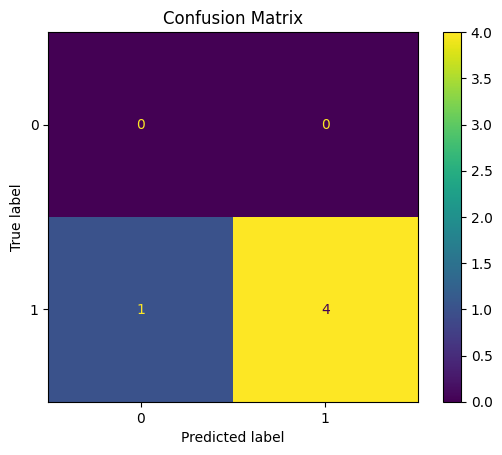

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create a confusion matrix
cm = confusion_matrix([1]*len(expected_responses), labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from nltk.translate.bleu_score import sentence_bleu

# Example of calculating BLEU score for each response
bleu_scores = [sentence_bleu([expected_responses[i]], model_predictions[i]) for i in range(len(expected_responses))]
avg_bleu_score = sum(bleu_scores) / len(bleu_scores)
print(f"Average BLEU Score: {avg_bleu_score:.2f}")


Average BLEU Score: 0.51


In [ ]:

from rouge_score import rouge_scorer
import sacrebleu

# Initialize the ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Calculate ROUGE scores
rouge_scores = [scorer.score(expected, predicted) for expected, predicted in zip(expected_responses, model_predictions)]

# Print average ROUGE scores
rouge1 = sum([score['rouge1'].fmeasure for score in rouge_scores]) / len(rouge_scores)
rouge2 = sum([score['rouge2'].fmeasure for score in rouge_scores]) / len(rouge_scores)
rougeL = sum([score['rougeL'].fmeasure for score in rouge_scores]) / len(rouge_scores)

print(f"ROUGE-1: {rouge1:.2f}")
print(f"ROUGE-2: {rouge2:.2f}")
print(f"ROUGE-L: {rougeL:.2f}")


ModuleNotFoundError: No module named 'rouge_score'

In [ ]:
!pip install bert-score rouge-score


  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nv

In [ ]:
from bert_score import score as bert_score
from rouge_score import rouge_scorer

# Test data in the required format
test_cases = [
    {"messages": [{"role": "user", "content": "Good morning! What's on your mind today?"}]},
    {"messages": [{"role": "user", "content": "I am feeling really joyful."}]},
    {"messages": [{"role": "user", "content": "Hello, I am here!!"}]},
    {"messages": [{"role": "user", "content": "I do not think I am good in anything."}]},
    {"messages": [{"role": "user", "content": "things will never get better, I never feel the hope"}]}
]

# Expected responses (for comparison)
expected_responses = [
    "Thank you for joining. Let's work through how you're feeling.",
    "Joy is such a beautiful emotion. What's bringing you joy today?",
    "Hello! Glad to see you in your therapy session. How can I assist you today?",
    "It is hard to feel this way. Let us talk about what is making you feel like this and how we can shift that mindset.",
    "It is natural to fear that things will not improve, especially when you are feeling low. But change is possible, and I am present to help you find hope. What is on your mind?"
]

# Example model responses (replace this with actual model responses)
model_responses = [
    "Thank you for joining. Let's work through how you're feeling.",
    "I am sorry you are feeling this way. It is okay to feel angry. Would you like to talk about it?",
    "Welcome to your therapy session. How can I assist you today?",
    "It is common to have moments of self-doubt, but I am here to help you recognize your strengths. What is something you are proud of?",
    "It is hard to hold on to hope when you are feeling this way. Let us talk about what is making you feel hopeless and how we can find a way through it."
]


In [ ]:
# Calculate BERTScore
P, R, F1 = bert_score(model_responses, expected_responses, lang="en", rescale_with_baseline=True)
print(f"BERTScore F1: {F1.mean().item():.4f}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore F1: 0.5339


In [ ]:
# Calculate BERTScore
P, R, F1 = bert_score(model_responses, expected_responses, lang="en", rescale_with_baseline=True)

# Convert to list for easier access
f1_scores = F1.tolist()

# Print out the BERTScore F1 values for each response
for i, score in enumerate(f1_scores):
    print(f"BERTScore F1 for test case {i+1}: {score:.4f}")

# If you want to plot these scores:
print(f1_scores)  # This will give you the list of F1 scores to use in the plots


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore F1 for test case 1: 1.0000
BERTScore F1 for test case 2: 0.1739
BERTScore F1 for test case 3: 0.7043
BERTScore F1 for test case 4: 0.3415
BERTScore F1 for test case 5: 0.4497
[0.9999996423721313, 0.17386552691459656, 0.7042720317840576, 0.34149879217147827, 0.44967830181121826]


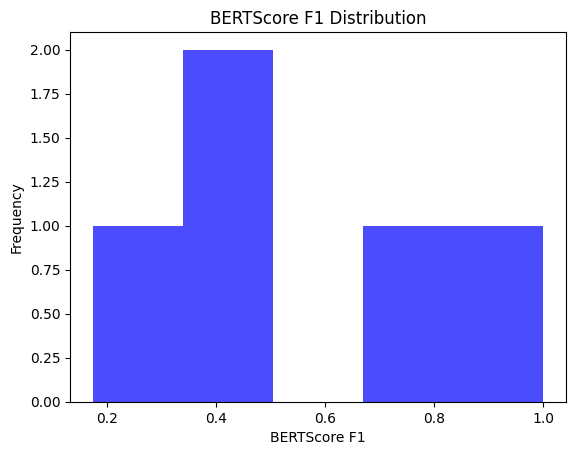

In [ ]:
import matplotlib.pyplot as plt

# Assuming f1_scores contains the BERTScore F1 values
plt.hist(f1_scores, bins=5, color='blue', alpha=0.7)
plt.title('BERTScore F1 Distribution')
plt.xlabel('BERTScore F1')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Calculate ROUGE Score
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
rouge1_scores = []
rougeL_scores = []

for ref, gen in zip(expected_responses, model_responses):
    scores = scorer.score(ref, gen)
    rouge1_scores.append(scores['rouge1'].fmeasure)
    rougeL_scores.append(scores['rougeL'].fmeasure)

print(f"Average ROUGE-1 Score: {sum(rouge1_scores)/len(rouge1_scores):.4f}")
print(f"Average ROUGE-L Score: {sum(rougeL_scores)/len(rougeL_scores):.4f}")


Average ROUGE-1 Score: 0.5147
Average ROUGE-L Score: 0.4848


In [ ]:
from rouge_score import rouge_scorer

# Initialize the ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

# Calculate ROUGE scores for each pair of responses
rouge1_scores = []
rougeL_scores = []

for ref, gen in zip(expected_responses, model_responses):
    scores = scorer.score(ref, gen)
    rouge1_scores.append(scores['rouge1'].fmeasure)
    rougeL_scores.append(scores['rougeL'].fmeasure)

# Print the calculated ROUGE scores
print("ROUGE-1 Scores:", rouge1_scores)
print("ROUGE-L Scores:", rougeL_scores)


ROUGE-1 Scores: [1.0, 0.12121212121212123, 0.7692307692307692, 0.23529411764705882, 0.4477611940298507]
ROUGE-L Scores: [1.0, 0.12121212121212123, 0.7692307692307692, 0.23529411764705882, 0.29850746268656714]


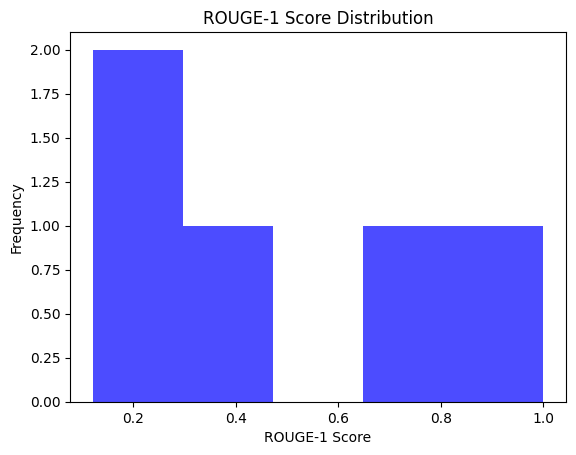

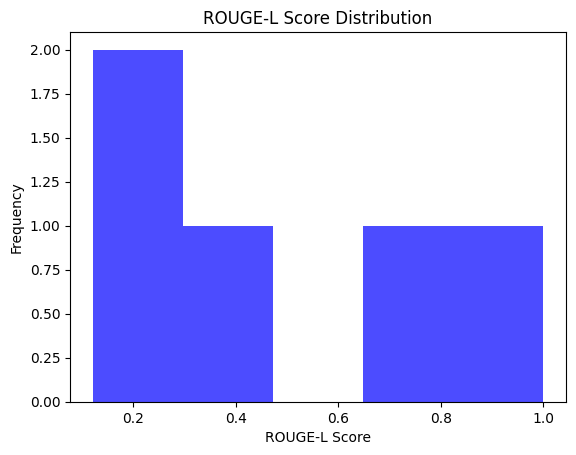

In [ ]:
import matplotlib.pyplot as plt

# Plotting ROUGE-1 Scores Distribution
plt.hist(rouge1_scores, bins=5, color='blue', alpha=0.7)
plt.title('ROUGE-1 Score Distribution')
plt.xlabel('ROUGE-1 Score')
plt.ylabel('Frequency')
plt.show()

# Plotting ROUGE-L Scores Distribution
plt.hist(rougeL_scores, bins=5, color='blue', alpha=0.7)
plt.title('ROUGE-L Score Distribution')
plt.xlabel('ROUGE-L Score')
plt.ylabel('Frequency')
plt.show()
